# Gapped k-mer Support Vector Machine (gkSVM) for Sequence Activity Regression

**Authorship:**
Adam Klie, *06/02/2021*
***
**Description:**
    Notebook to train gkSVM regressors for predicting sequence activity based on the implmentation in https://github.com/kundajelab/lsgkm-svr.

 - Currentlly allows the user to create a custom script with gkSVM hyperparameters
***
**TODOs:**
 - <font color='red'> Figure out how to work with kwargs in future </font>
***

# Set-up

## Package import

In [2]:
# Classics
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

## Notebook params

In [3]:
# Data params
DATASET = "2021_OLS_Library"  # Which dataset to look at
FEATURES = "fasta"  # What features to use to train the model
LABELS = "activity"
PREPROCESS = "inf--inf"  # Preprocessing steps, separated by "-"
SPLIT = 0.9
SUBSET = False

In [80]:
# gkSVM hyperparams. See documentation for details
SVM_TYPE = "3"
KERNEL = "2"
WORD_LENGTH = "11"
INFORM_COLS = "7"
MISMATCHES = "3"
REG_PARAM = "1.0"
POS_WEIGHT = "1.0"
REV_COMP = False
HYPERPARAM = "{}-{}-{}-{}-{}-{}-{}-{}".format(
    SVM_TYPE,
    KERNEL,
    WORD_LENGTH,
    INFORM_COLS,
    MISMATCHES,
    REV_COMP,
    REG_PARAM,
    POS_WEIGHT,
)
ARCHITECTURE = "gkmSVM"

## Directory structure

In [81]:
# Output directory
BASE_DIR="/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/"
OUTDIR = os.path.join(BASE_DIR, "{}_{}_{}_{}".format(PREPROCESS, FEATURES, HYPERPARAM, ARCHITECTURE))
if not os.path.exists(OUTDIR):
    print("Making directory {}".format(OUTDIR))
    os.makedirs(OUTDIR)
else:
    print("Directory already exists")

Directory already exists


In [82]:
# Define paths to train and validation data. Train data must be split into each class
in_dir = "/cellar/users/aklie/projects/EUGENE/data/{0}".format(DATASET)
first = "fasta/{0}_X-train-{1}_{2}-pos.fa".format(PREPROCESS, SPLIT, FEATURES)
second = "activity/{0}_y-train-{1}_{2}.txt".format(PREPROCESS, SPLIT, LABELS)
val = "fasta/{0}_X-test-{1}_{2}.fa".format(PREPROCESS, round(1-SPLIT, 1), FEATURES)
in_dir, first, second, val

('/cellar/users/aklie/projects/EUGENE/data/2021_OLS_Library',
 'fasta/inf--inf_X-train-0.9_fasta-pos.fa',
 'activity/inf--inf_y-train-0.9_activity.txt',
 'fasta/inf--inf_X-test-0.1_fasta.fa')

# Train gkSVM model with script

In [76]:
from eugene.utils.hpc import gkmsvm_slurm_train_script

In [78]:
gkmsvm_slurm_train_script(in_dir, first, second, val, OUTDIR, HYPERPARAM, PREPROCESS, "fasta", ARCHITECTURE)

Usage: sbatch --job-name=train_inf--inf_fasta_gkmSVM-reg_3-2-11-7-3-False-1.0-1.0 -o /cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/inf--inf_fasta_3-2-11-7-3-False-1.0-1.0_gkmSVM/train_inf--inf_fasta_gkmSVM-reg_3-2-11-7-3-False-1.0-1.0.out -e /cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/inf--inf_fasta_3-2-11-7-3-False-1.0-1.0_gkmSVM/train_inf--inf_fasta_gkmSVM-reg_3-2-11-7-3-False-1.0-1.0.err --mem=20G train_inf--inf_fasta_gkmSVM-reg_3-2-11-7-3-False-1.0-1.0.sh
Successfully generated /cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/inf--inf_fasta_3-2-11-7-3-False-1.0-1.0_gkmSVM/train_inf--inf_fasta_gkmSVM-reg_3-2-11-7-3-False-1.0-1.0.sh


In [1]:
#!sbatch --job-name=train_inf--inf_fasta_gkmSVM-reg_3-2-11-7-3-False-1.0-1.0 -o /cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/inf--inf_fasta_3-2-11-7-3-False-1.0-1.0_gkmSVM/train_inf--inf_fasta_gkmSVM-reg_3-2-11-7-3-False-1.0-1.0.out -e /cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/inf--inf_fasta_3-2-11-7-3-False-1.0-1.0_gkmSVM/train_inf--inf_fasta_gkmSVM-reg_3-2-11-7-3-False-1.0-1.0.err --mem=20G train_inf--inf_fasta_gkmSVM-reg_3-2-11-7-3-False-1.0-1.0.sh

# Validation Set performance

In [62]:
from eugene.utils.benchmark import get_scores
from sklearn.metrics import r2_score, mean_squared_error

In [46]:
model = "{}_{}_{}-reg_{}".format(PREPROCESS, FEATURES, ARCHITECTURE, HYPERPARAM)
model_name = os.path.join(OUTDIR, model)

('/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/inf--inf_fasta_3-2-11-7-3-False-1.0-1.0_gkmSVM/inf--inf_fasta_gkmSVM-reg_3-2-11-7-3-False-1.0-1.0.train-pos.predict.txt',
 '/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/inf--inf_fasta_3-2-11-7-3-False-1.0-1.0_gkmSVM/inf--inf_fasta_gkmSVM-reg_3-2-11-7-3-False-1.0-1.0.test.predict.txt')

## **Training scores**

In [47]:
tr_preds_file = "{}.train-pos.predict.txt".format(model_name)
tr_targets_file = os.path.join(in_dir, second)
tr_preds_file, tr_targets_file

('/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/inf--inf_fasta_3-2-11-7-3-False-1.0-1.0_gkmSVM/inf--inf_fasta_gkmSVM-reg_3-2-11-7-3-False-1.0-1.0.train-pos.predict.txt',
 '/cellar/users/aklie/projects/EUGENE/data/2021_OLS_Library/activity/inf--inf_y-train-0.9_activity.txt')

In [48]:
# Make sure ordering is correct
tr_preds = get_scores(tr_file)
tr_targets = np.array([float(x.rstrip().split("\t")[-1]) for x in open(tr_targets_file)])
len(tr_preds), len(tr_targets)

(414629, 414629)

In [106]:
tr_r2_score = round(r2_score(tr_targets, tr_preds), 3)
tr_mse = round(mean_squared_error(tr_targets, tr_preds), 3)

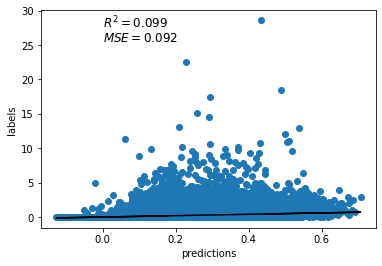

In [107]:
# Plot
ax = plt.scatter(tr_preds, tr_targets)
plt.plot(tr_preds, tr_preds, color="black")
plt.xlabel("predictions")
plt.ylabel("labels")
plt.text(0, max(tr_targets)-1, r"$R^2= $" + str(tr_r2_score), fontsize=12)
plt.text(0, max(tr_targets)-3, r"$MSE= $" + str(tr_mse), fontsize=12)
plt.show()

## **Test scores**

In [50]:
val_preds_file = "{}.test.predict.txt".format(model_name)
val_targets_file = os.path.join(in_dir, "activity", "{0}_y-test-{1}_{2}.txt".format(PREPROCESS, str(round(1-SPLIT, 1)), LABELS))
val_preds_file, val_targets_file

('/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/inf--inf_fasta_3-2-11-7-3-False-1.0-1.0_gkmSVM/inf--inf_fasta_gkmSVM-reg_3-2-11-7-3-False-1.0-1.0.test.predict.txt',
 '/cellar/users/aklie/projects/EUGENE/data/2021_OLS_Library/activity/inf--inf_y-test-0.1_activity.txt')

In [51]:
# Make sure ordering is correct
val_preds = get_scores(val_file)
val_targets = np.array([float(x.rstrip().split("\t")[-1]) for x in open(val_targets_file)])
len(val_preds), len(val_targets)

(46070, 46070)

In [108]:
val_r2_score = round(r2_score(val_targets, val_preds), 3)
val_mse = round(mean_squared_error(val_targets, val_preds), 3)

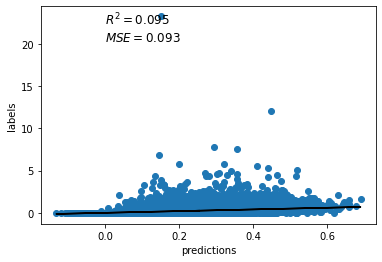

In [109]:
# Plot
ax = plt.scatter(val_preds, val_targets)
plt.plot(val_preds, val_preds, color="black")
plt.xlabel("predictions")
plt.ylabel("labels")
plt.text(0, max(val_targets)-1, r"$R^2= $" + str(val_r2_score), fontsize=12)
plt.text(0, max(val_targets)-3, r"$MSE= $" + str(val_mse), fontsize=12)
plt.show()

In [113]:
TEST = os.path.join(in_dir, val)

In [129]:
OUTDIR

'/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/inf--inf_fasta_3-2-11-7-3-False-1.0-1.0_gkmSVM'

In [132]:
%%bash -s "$in_dir" "$val" "$OUTDIR"
echo "head -20 $1/$2 > $3/subset_gkmexplain_seqs.fa"

head -20 /cellar/users/aklie/projects/EUGENE/data/2021_OLS_Library/fasta/inf--inf_X-test-0.1_fasta.fa > /cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/inf--inf_fasta_3-2-11-7-3-False-1.0-1.0_gkmSVM/subset_gkmexplain_seqs.fa


In [139]:
%%bash -s "$in_dir" "$val" "$OUTDIR" "$model_name"
head -20 $1/$2 > $3/subset_gkmexplain_seqs.fa
gkmexplain $3/subset_gkmexplain_seqs.fa $4.model.txt $3/subset_gkmexplain_imp.txt

INFO 2022-06-04 10:13:47: Number of threads is set to 1
INFO 2022-06-04 10:13:47: load model /cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/inf--inf_fasta_3-2-11-7-3-False-1.0-1.0_gkmSVM/inf--inf_fasta_gkmSVM-reg_3-2-11-7-3-False-1.0-1.0.model.txt
INFO 2022-06-04 10:13:47: reading... 1000/223221
INFO 2022-06-04 10:13:47: reading... 2000/223221
INFO 2022-06-04 10:13:47: reading... 3000/223221
INFO 2022-06-04 10:13:47: reading... 4000/223221
INFO 2022-06-04 10:13:47: reading... 5000/223221
INFO 2022-06-04 10:13:47: reading... 6000/223221
INFO 2022-06-04 10:13:47: reading... 7000/223221
INFO 2022-06-04 10:13:47: reading... 8000/223221
INFO 2022-06-04 10:13:47: reading... 9000/223221
INFO 2022-06-04 10:13:47: reading... 10000/223221
INFO 2022-06-04 10:13:47: reading... 11000/223221
INFO 2022-06-04 10:13:47: reading... 12000/223221
INFO 2022-06-04 10:13:47: reading... 13000/223221
INFO 2022-06-04 10:13:47: reading... 14000/223221
INFO 2022-06-04 10:13:47: reading... 15

In [145]:
#read in the importance scores
impscores = [
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open(os.path.join(OUTDIR, "subset_gkmexplain_imp.txt"))
]

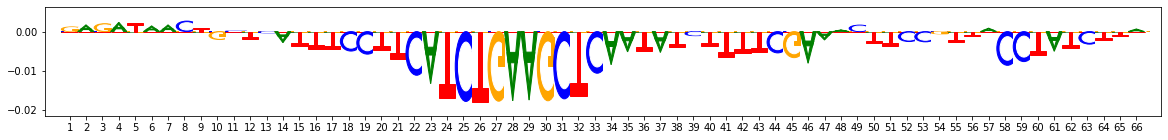

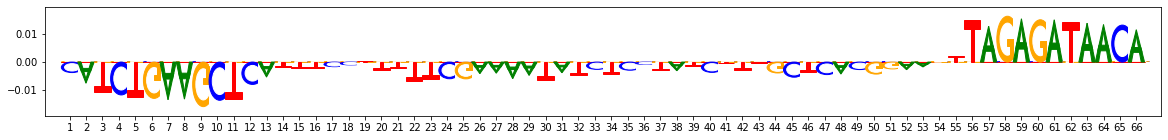

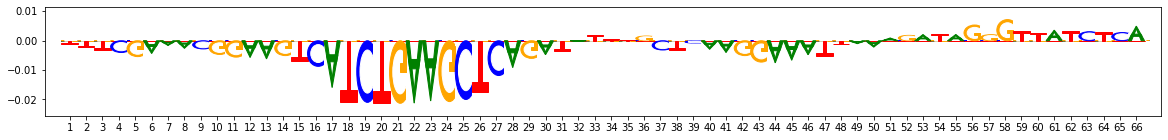

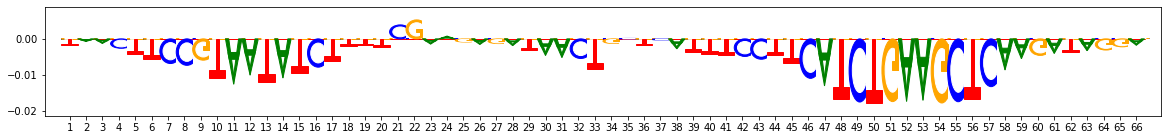

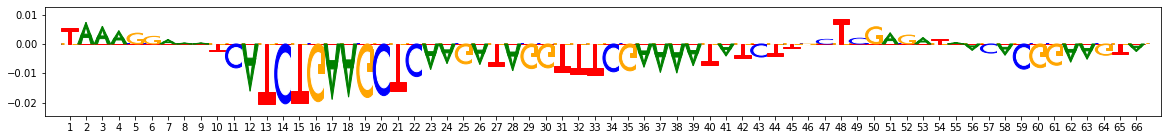

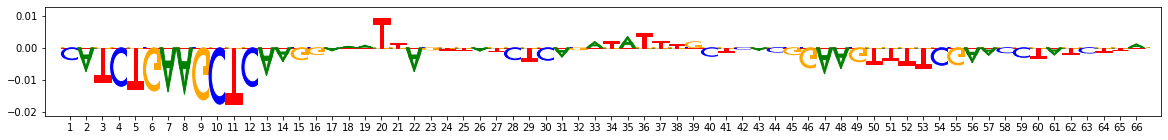

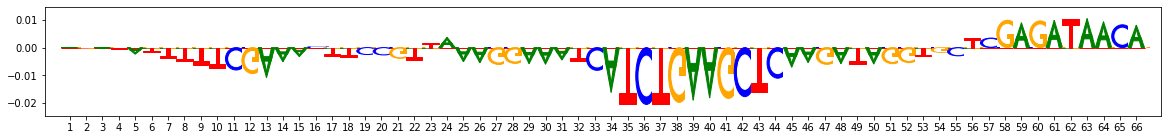

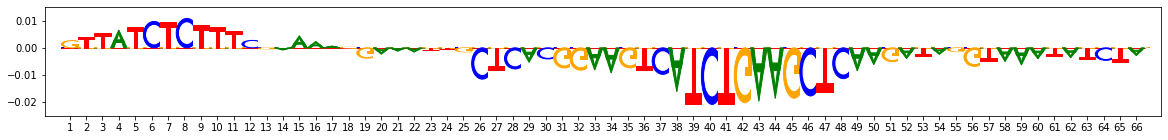

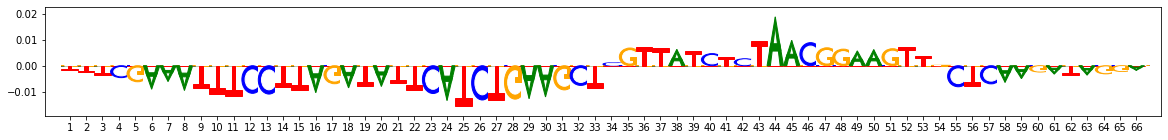

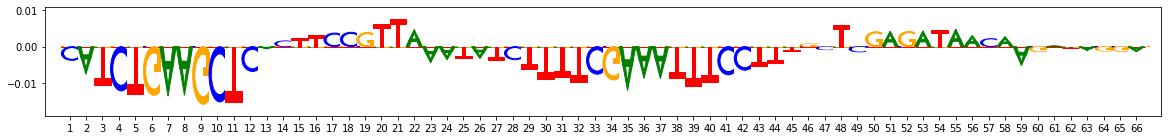

In [150]:
#visualize importance scores on a couple of sequences, as a sanity check
import vizsequence
for score in impscores:
    vizsequence.viz_sequence.plot_weights(score)

# Scratch

In [240]:
project_utils.classification_report(out_path="{}".format(OUTDIR),
                                    train_X=None, test_X=None, 
                                    train_y=y_train, test_y=y_test,
                                    train_preds=y_tr_preds, test_preds=y_preds,
                                    train_probs=y_tr_probs, test_probs=y_probs)

Predictions provided, skipping them
Generating confusion matrix
Calculating classification metrics
Metric	Train	Test
Accuracy	0.7304	0.7215
Precision	0.6991	0.6897
Recall	0.7635	0.7493
F0.1-Score	0.6997	0.6903
F0.5-Score	0.7111	0.7009
F1-Score	0.7299	0.7183
F2-Score	0.7497	0.7365
F10-Score	0.7628	0.7486
Plotting PR Curve
Plotting ROC Curve
Generating report
